
# Importing Libraries

In [ ]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
import copy
from sklearn.preprocessing import MinMaxScaler,StandardScaler, quantile_transform


Generating Data using different distributions

In [ ]:
np.random.seed(7)
x = pd.DataFrame()
x['Feature1'] = np.random.normal(loc = np.random.randint(1,10), scale = np.random.randint(1,5), size = (1000) )
x['Feature2'] = np.random.uniform(low = np.random.randint(1,5), high = np.random.randint(5,10), size = (1000) )
x['Feature3'] = np.random.chisquare(df = np.random.randint(1,10), size = (1000))
x['Feature4'] = np.random.gamma(shape = np.random.randint(1,10), scale = np.random.randint(1,5), size = (1000) )
y = (x*np.random.uniform(low = 1, high = 3, size = (4))).sum(axis = 1) + np.random.uniform(1,5,size = (1000))
x 

,Feature1,Feature2,Feature3,Feature4
0,1.239555,7.242226,2.242005,7.201365
1,4.130044,2.324369,4.126454,2.586075
2,4.229063,1.159379,2.456374,1.833356
3,4.559497,5.479608,3.740554,3.932227
4,4.461068,8.136870,6.300223,4.096530
...,...,...,...,...
995,6.739709,8.430566,0.963151,4.037298
996,6.587049,2.566936,5.463971,3.483581
997,4.625521,8.025549,2.734649,3.934138
998,7.760513,7.366398,4.885513,7.206477


In [ ]:
y

0      45.281790
1      32.477002
2      24.006433
3      41.691771
4      57.868459
         ...    
995    46.948967
996    42.826183
997    47.330691
998    61.222935
999    40.771511
Length: 1000, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

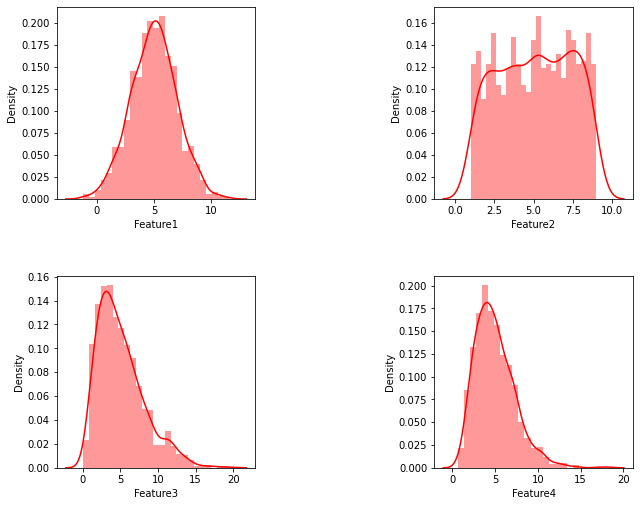

In [ ]:
def showdist(x):
    i = 1
    plt.figure(figsize=(10,8))
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.9, 
                        hspace=0.4)
    for col in x.columns:
        plt.subplot(2,2,i)
        sns.distplot(x[col], bins=25, color="r")
        i += 1
    plt.show()
showdist(x)

In [ ]:
def showscale(x):
  table = pd.DataFrame()
  table['Feature'] = x.columns
  table['Min value'] = x.min().values
  table['Mean value'] = x.mean().values
  table['Max value'] = x.max().values
  table['Standard deviation'] = x.std().values
  return table
showscale(x) 

,Feature,Min value,Mean value,Max value,Standard deviation
0,Feature1,-1.219256,4.978986,11.570076,1.998940
1,Feature2,1.000669,5.093217,8.991429,2.311718
2,Feature3,0.127028,5.092461,19.394367,3.102995
3,Feature4,0.719081,5.006102,18.274812,2.336563


In [ ]:
def modelfit(x,y):  
  regr = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  rmse = math.sqrt(mean_squared_error(y_test, y_pred))
  summary = (regr.coef_,regr.intercept_,rmse)
  return summary

In [ ]:
table = pd.DataFrame()
summarywn = modelfit(x,y)
table['Normalization'] = ["Without normalization"]
table['Regr Coef1'] = [summarywn[0][0]]
table['Regr Coef2'] = [summarywn[0][1]]
table['Regr Coef3'] = [summarywn[0][2]]
table['Regr Coef4'] = [summarywn[0][3]]
table['Regression Intercept'] = [summarywn[1]]
table['RMSE'] = [summarywn[2]]

table


,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,1.686073,2.67878,2.297204,2.234023,3.031331,1.130229


## Topic 2 - Normalization of covariates

## Using min max scaler normalization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

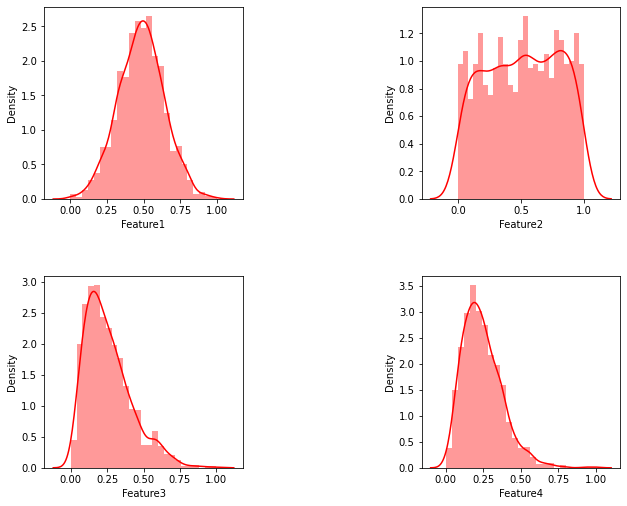

In [ ]:
def minmax(x,y) : 
  scaling = MinMaxScaler()
  minmaxscaledx = pd.DataFrame(scaling.fit_transform(x))
  minmaxscaledy = pd.DataFrame(scaling.fit_transform(pd.DataFrame(y)))
  minmaxscaledx.columns = x.columns
  return minmaxscaledx,minmaxscaledy
  
minmaxscaledx, minmaxscaledy = minmax(x,y)

showdist(minmaxscaledx)

In [ ]:
showscale(minmaxscaledx)

,Feature,Min value,Mean value,Max value,Standard deviation
0,Feature1,0.0,0.484642,1.0,0.156297
1,Feature2,0.0,0.512160,1.0,0.289299
2,Feature3,0.0,0.257712,1.0,0.161049
3,Feature4,0.0,0.244195,1.0,0.133094


In [ ]:
summarym = modelfit(minmaxscaledx, minmaxscaledy)
table.loc[len(table.index)] = ["MinmaxScaler",summarym[0][0][0],summarym[0][0][1],summarym[0][0][2],summarym[0][0][3] ,summarym[1], summarym[2]]
table

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,1.686073,2.67878,2.297204,2.234023,3.03133,1.130229
1,MinmaxScaler,0.283883,0.28180,0.582689,0.516324,[-0.18084978455302553],0.014879


## Using Standardisation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

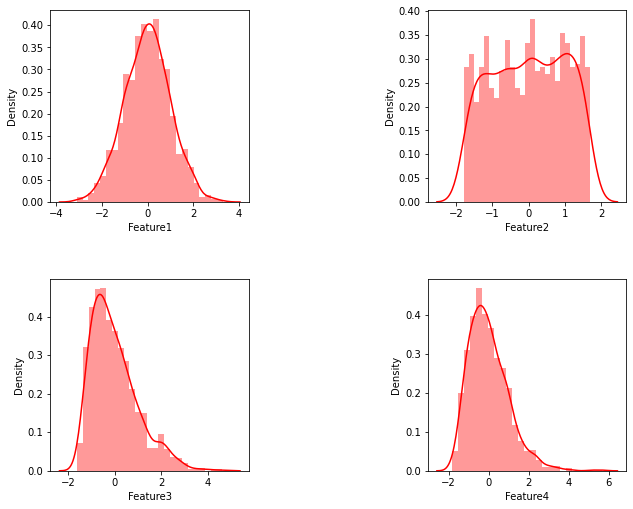

In [ ]:
def stdn(x,y):
  scaling = StandardScaler()
  stdx = pd.DataFrame(scaling.fit_transform(x))
  stdy = pd.DataFrame(scaling.fit_transform(pd.DataFrame(y)))
  stdx.columns = x.columns
  return stdx, stdy
stdx, stdy = stdn(x,y)
showdist(stdx)

In [ ]:
showscale(stdx)

,Feature,Min value,Mean value,Max value,Standard deviation
0,Feature1,-3.102316,1.697531e-16,3.298942,1.0005
1,Feature2,-1.771235,1.509903e-16,1.687128,1.0005
2,Feature3,-1.601007,-2.830514e-16,4.611371,1.0005
3,Feature4,-1.835673,1.592060e-16,5.681570,1.0005


In [ ]:
summarys = modelfit(stdx, stdy)
table.loc[len(table.index)] = ["Standardisation",summarys[0][0][0],summarys[0][0][1],summarys[0][0][2],summarys[0][0][3] ,summarys[1], summarys[2]]
table

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,1.686073,2.678780,2.297204,2.234023,3.03133,1.130229
1,MinmaxScaler,0.283883,0.281800,0.582689,0.516324,[-0.18084978455302553],0.014879
2,Standardisation,0.297037,0.545766,0.628224,0.460044,[-0.0003403822640097448],0.099659


## Using quantile based transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

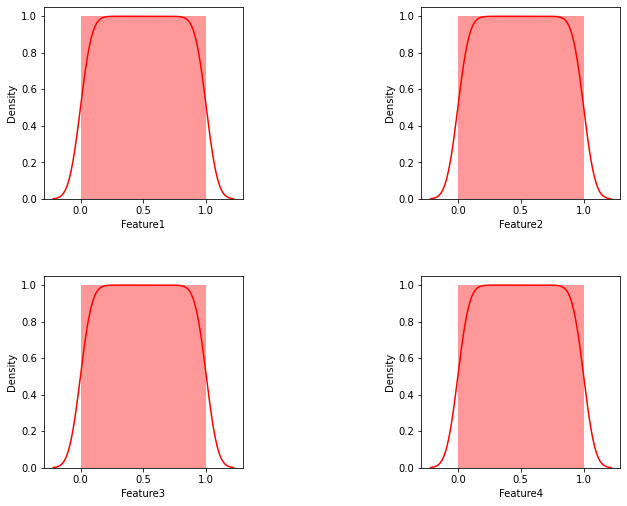

In [ ]:
def quant(x,y):  
  quantx = pd.DataFrame(quantile_transform(x))
  quanty = pd.DataFrame(quantile_transform(pd.DataFrame(y)))
  quantx.columns = x.columns
  return quantx, quanty
quantx, quanty = quant(x,y)
showdist(quantx)

In [ ]:
showscale(quantx)

,Feature,Min value,Mean value,Max value,Standard deviation
0,Feature1,0.0,0.5,1.0,0.289109
1,Feature2,0.0,0.5,1.0,0.289109
2,Feature3,0.0,0.5,1.0,0.289109
3,Feature4,0.0,0.5,1.0,0.289109


In [ ]:
summaryq = modelfit(quantx, quanty)
table.loc[len(table.index)] = ["Quantile based",summaryq[0][0][0],summaryq[0][0][1],summaryq[0][0][2],summaryq[0][0][3] ,summaryq[1], summaryq[2]]
table

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,1.686073,2.678780,2.297204,2.234023,3.03133,1.130229
1,MinmaxScaler,0.283883,0.281800,0.582689,0.516324,[-0.18084978455302553],0.014879
2,Standardisation,0.297037,0.545766,0.628224,0.460044,[-0.0003403822640097448],0.099659
3,Quantile based,0.282408,0.544608,0.577364,0.448106,[-0.4250685412306432],0.082913


# Effect of outlier on different types of normalization

In [ ]:
xwithoutlier = copy.deepcopy(x)
i = 0
for col in x.columns:
            if i % 2 == 0:
                xwithoutlier[col][np.arange(0,1000,20)] = np.random.uniform(2*x[col].min() + 1,2*x[col].min(),size = (50))  
            else:
                xwithoutlier[col][np.arange(0,1000,20)] = np.random.uniform(2*x[col].max() - 1,2*x[col].max(),size = (50))
            

In [ ]:
tableo = pd.DataFrame()
summarywno = modelfit(xwithoutlier,y)
tableo['Normalization'] = ["Without normalization"]
tableo['Regr Coef1'] = [summarywno[0][0]]
tableo['Regr Coef2'] = [summarywno[0][1]]
tableo['Regr Coef3'] = [summarywno[0][2]]
tableo['Regr Coef4'] = [summarywno[0][3]]
tableo['Regression Intercept'] = [summarywno[1]]
tableo['RMSE'] = [summarywno[2]]

tableo

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,-0.235309,2.01068,1.887949,1.76579,21.467652,5.726205


## Min Max scaler

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

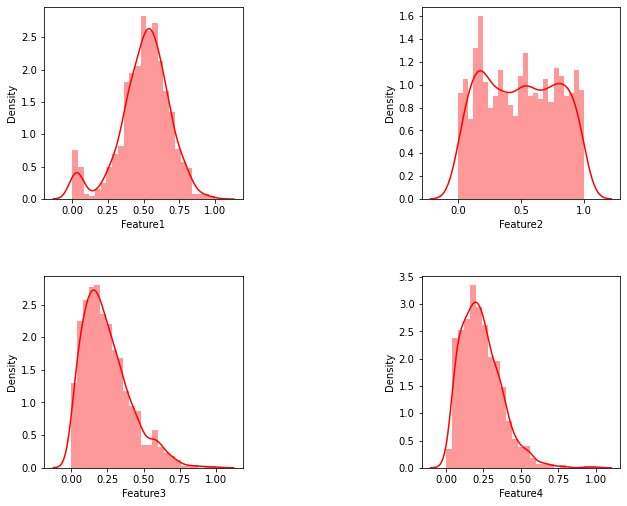

In [ ]:
minmaxscaledxo, minmaxscaledy = minmax(xwithoutlier,y)
showdist(minmaxscaledxo)

In [ ]:
showscale(minmaxscaledxo)

,Feature,Min value,Mean value,Max value,Standard deviation
0,Feature1,0.0,0.504965,1.0,0.176905
1,Feature2,0.0,0.495036,1.0,0.291111
2,Feature3,0.0,0.245879,1.0,0.164891
3,Feature4,0.0,0.235536,1.0,0.135289


In [ ]:
summarymo = modelfit(minmaxscaledxo, minmaxscaledy)
tableo.loc[len(tableo.index)] = ["MinmaxScaler",summarymo[0][0][0],summarymo[0][0][1],summarymo[0][0][2],summarymo[0][0][3] ,summarymo[1], summarymo[2]]
tableo

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,-0.235309,2.010680,1.887949,1.765790,21.4677,5.726205
1,MinmaxScaler,-0.043353,0.211518,0.478881,0.408107,[0.08251762209040597],0.075385


## Standardization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

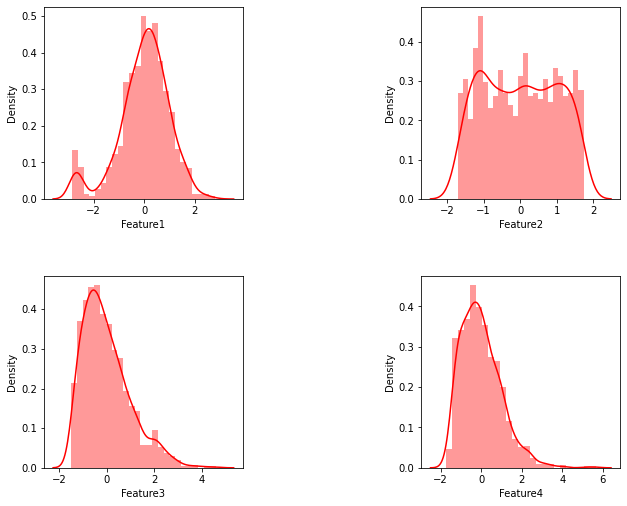

In [ ]:
stdxo , stdy = stdn(xwithoutlier,y)
showdist(stdxo)

In [ ]:
showscale(stdxo)

,Feature,Min value,Mean value,Max value,Standard deviation
0,Feature1,-2.855872,3.035350e-16,2.799712,1.0005
1,Feature2,-1.701358,-1.543210e-16,1.735476,1.0005
2,Feature3,-1.491909,5.456746e-17,4.575736,1.0005
3,Feature4,-1.741849,2.041700e-16,5.653413,1.0005


In [ ]:
summaryso = modelfit(stdxo, stdy)
tableo.loc[len(tableo.index)] = ["Standardisation",summaryso[0][0][0],summaryso[0][0][1],summaryso[0][0][2],summaryso[0][0][3] ,summaryso[1], summaryso[2]]
tableo

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,-0.235309,2.010680,1.887949,1.765790,21.4677,5.726205
1,MinmaxScaler,-0.043353,0.211518,0.478881,0.408107,[0.08251762209040597],0.075385
2,Standardisation,-0.051342,0.412215,0.528620,0.369620,[0.01236804786384365],0.504915


## Quantile based normalization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

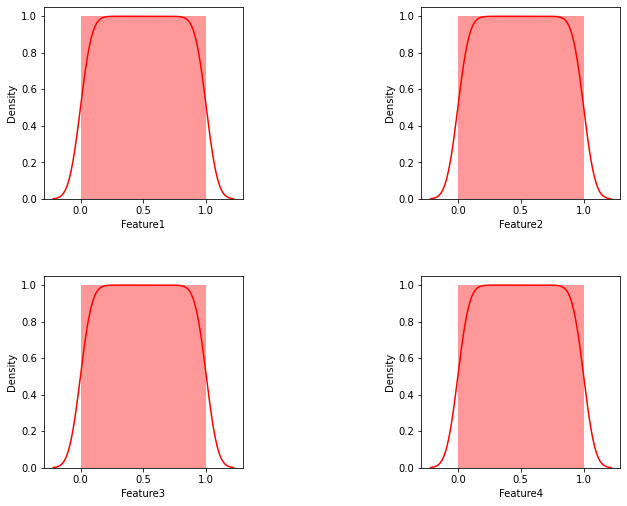

In [ ]:
quantxo, quanty = quant(xwithoutlier,y)
showdist(quantxo)

In [ ]:
showscale(quantxo)

,Feature,Min value,Mean value,Max value,Standard deviation
0,Feature1,0.0,0.5,1.0,0.289109
1,Feature2,0.0,0.5,1.0,0.289109
2,Feature3,0.0,0.5,1.0,0.289109
3,Feature4,0.0,0.5,1.0,0.289109


Table with outliers

In [ ]:
summaryqo = modelfit(quantxo, quanty)
tableo.loc[len(tableo.index)] = ["Quantile based",summaryqo[0][0][0],summaryqo[0][0][1],summaryqo[0][0][2],summaryqo[0][0][3] ,summaryqo[1], summaryqo[2]]
tableo

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,-0.235309,2.010680,1.887949,1.765790,21.4677,5.726205
1,MinmaxScaler,-0.043353,0.211518,0.478881,0.408107,[0.08251762209040597],0.075385
2,Standardisation,-0.051342,0.412215,0.528620,0.369620,[0.01236804786384365],0.504915
3,Quantile based,0.081847,0.411581,0.430083,0.310623,[-0.1131020289820831],0.156769


Table without outliers

In [ ]:
table

,Normalization,Regr Coef1,Regr Coef2,Regr Coef3,Regr Coef4,Regression Intercept,RMSE
0,Without normalization,1.686073,2.678780,2.297204,2.234023,3.03133,1.130229
1,MinmaxScaler,0.283883,0.281800,0.582689,0.516324,[-0.18084978455302553],0.014879
2,Standardisation,0.297037,0.545766,0.628224,0.460044,[-0.0003403822640097448],0.099659
3,Quantile based,0.282408,0.544608,0.577364,0.448106,[-0.4250685412306432],0.082913
